# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `bill_depth_mm` using the other variables in the dataset.

**Dummify** all variables that require this.

In [23]:
import pandas as pd
from palmerpenguins import load_penguins
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from plotnine import ggplot, aes, geom_line, geom_point, labs, theme_minimal, scale_color_manual

In [24]:
penguins = load_penguins()
penguins.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex,year
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,male,2007
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,female,2007
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,female,2007
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN,2007
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,female,2007


In [25]:
# Dummify categorical variables
penguins_dummified = pd.get_dummies(penguins, drop_first=True)

# Display the first few rows of the dummified dataset
penguins_dummified.head()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,species_Chinstrap,species_Gentoo,island_Dream,island_Torgersen,sex_male
0,39.1,18.7,181.0,3750.0,2007,False,False,False,True,True
1,39.5,17.4,186.0,3800.0,2007,False,False,False,True,False
2,40.3,18.0,195.0,3250.0,2007,False,False,False,True,False
3,NaN,NaN,NaN,NaN,2007,False,False,False,True,False
4,36.7,19.3,193.0,3450.0,2007,False,False,False,True,False


In [26]:
penguins_dummified.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   bill_length_mm     342 non-null    float64
 1   bill_depth_mm      342 non-null    float64
 2   flipper_length_mm  342 non-null    float64
 3   body_mass_g        342 non-null    float64
 4   year               344 non-null    int64  
 5   species_Chinstrap  344 non-null    bool   
 6   species_Gentoo     344 non-null    bool   
 7   island_Dream       344 non-null    bool   
 8   island_Torgersen   344 non-null    bool   
 9   sex_male           344 non-null    bool   
dtypes: bool(5), float64(4), int64(1)
memory usage: 15.2 KB


In [27]:
penguins_dummified.isna().sum()

bill_length_mm       2
bill_depth_mm        2
flipper_length_mm    2
body_mass_g          2
year                 0
species_Chinstrap    0
species_Gentoo       0
island_Dream         0
island_Torgersen     0
sex_male             0
dtype: int64

In [28]:
penguins_dummified.dropna(inplace = True)

Let's use the other variables to predict `bill_depth_mm`. Prepare your data and fit the following models on a training dataset subset of the entire dataset:

* Four different models, each containing a different set of predictor variables

Create a plot like the right plot of Fig 1. in our `Model Validation` chapter with the training and test error plotted for each of your four models.

Which of your models was best?

In [29]:
X = penguins_dummified.drop(columns='bill_depth_mm')
y = penguins_dummified['bill_depth_mm']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30)

In [30]:
models = {
    "Model 1": X_train.columns,
    "Model 2": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap', 'species_Gentoo', 'island_Dream'],
    "Model 3": ['bill_length_mm', 'flipper_length_mm', 'body_mass_g', 'species_Chinstrap'],
    "Model 4": ['bill_length_mm', 'flipper_length_mm']
    
}

ChatGPT was used to debug the code.

In [31]:
model_names = []
error_types = []
error_values = []

# Loop through each model, fit a linear regression, and calculate errors
for model_name, predictors in models.items():
    X_train_model = X_train[predictors]
    X_test_model = X_test[predictors]

    model = LinearRegression()
    model.fit(X_train_model, y_train)

    y_train_pred = model.predict(X_train_model)
    y_test_pred = model.predict(X_test_model)

    train_error = mean_squared_error(y_train, y_train_pred)
    test_error = mean_squared_error(y_test, y_test_pred)

    model_names.extend([model_name, model_name])
    error_types.extend(["Training Error", "Test Error"])
    error_values.extend([train_error, test_error])

In [32]:
error= pd.DataFrame({
    "Model": model_names,
    "Error Type": error_types,
    "Mean Squared Error": error_values
})

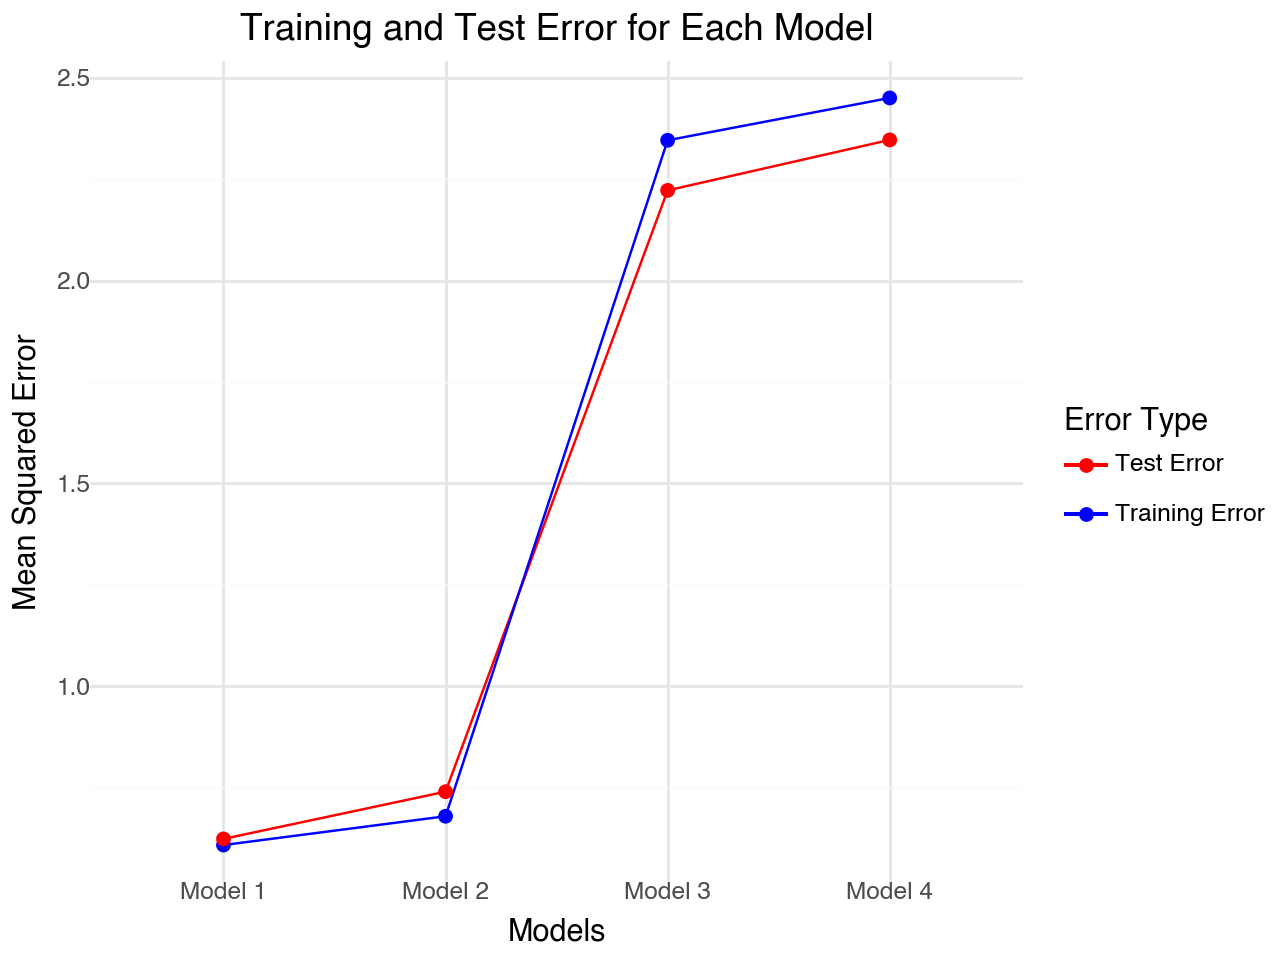

In [35]:

plot = (
    ggplot(error, aes(x='Model', y='Mean Squared Error', color='Error Type', group='Error Type'))
    + geom_line()
    + geom_point(size=2)
    + labs(title="Training and Test Error for Each Model",
           x="Models",
           y="Mean Squared Error")
    + scale_color_manual(values={"Training Error": "blue", "Test Error": "red"})
    + theme_minimal()
)
plot

Model 1 is the best as it contains all the preditor variables. We can see as remove the the predictor variables the error increases.